In [1]:
# Packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('medical_examination.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Calculate BMI and add overweight column
- BMI > 25: 1
- Otherwise: 0

In [4]:
BMI = (df.weight) / (df.height * 0.01)**2
BMI

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Length: 70000, dtype: float64

In [5]:
# encode overweight value to '1' if it is greater than 25
# otherwise '0'

df['overweight'] = BMI > 25.0
df['overweight'] = df.overweight.astype(int)
df['overweight']

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int32

In [6]:
df['overweight'].value_counts()

1    43546
0    26454
Name: overweight, dtype: int64

### Data Normalization
If the value of `cholesterol` or `gluc` is 1, make the value 0. If the value is more than 1, make the value 1.

In [7]:
df.loc[(df.cholesterol == 1), 'cholesterol'] = 0
df.loc[df.cholesterol > 1, 'cholesterol'] = 1

df.loc[(df.gluc == 1), 'gluc'] = 0
df.loc[df.gluc > 1, 'gluc'] = 1

In [8]:
df.cholesterol.value_counts()

0    52385
1    17615
Name: cholesterol, dtype: int64

In [9]:
df.gluc.value_counts()

0    59479
1    10521
Name: gluc, dtype: int64

Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. The dataset should be split by 'Cardio' so there is one chart for each `cardio` value. 

The chart should look like this

<img src="examples/Figure_1.png">

In [10]:
variables = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']
df_melted = pd.melt(
    df,
    id_vars = ['cardio'],
    value_vars = variables
)

In [11]:
df_melted.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


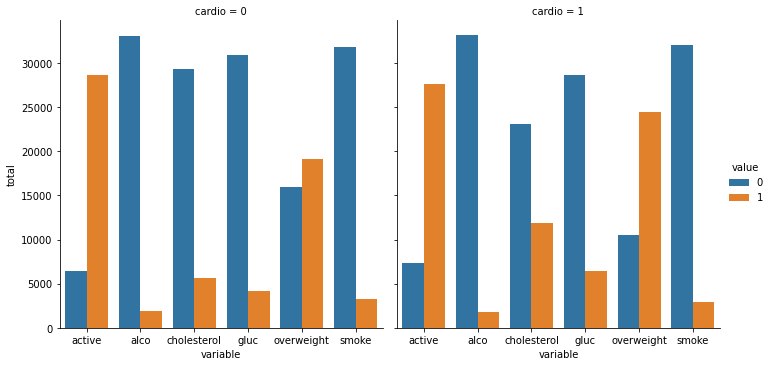

In [12]:
figure = sns.catplot(data = df_melted, kind = "count", x = 'variable', hue = 'value', col = 'cardio')
figure.set_ylabels('total')

### Data Cleaning

- diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi'])`)
- height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile

In [13]:
df_heat = df.loc[(df.ap_lo <= df.ap_hi)
                 & (df.height >= df.height.quantile(0.025))
                 & (df.height <= df.height.quantile(0.975))
                 & (df.weight >= df.weight.quantile(0.025))
                 & (df.weight <= df.weight.quantile(0.975)), :]
df_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's `heatmap()`.
Mask the upper triangle. The chart should look like this

<img src="examples/Figure_2.png">

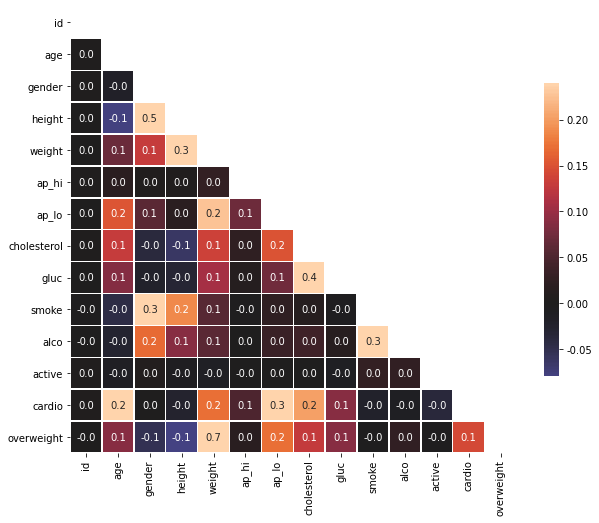

In [14]:
fig, ax = plt.subplots(figsize=(10, 12))
correlation_matrix = df_heat.corr()
upper_triangle = np.triu(correlation_matrix)

ax = sns.heatmap(
        correlation_matrix,
        linewidths=.5,
        annot=True,
        fmt='.1f',
        mask=upper_triangle,
        square=True,
        center=0,
        vmin=-0.08,
        vmax=0.24,
        cbar_kws={
            'shrink': .45,
            'format': '%.2f'
        })


plt.show()

In [15]:
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
BMI = (df.weight) / (df.height * 0.01)**2
df['overweight'] = BMI > 25
df.overweight = df.overweight.astype(int)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df.loc[(df.cholesterol == 1), 'cholesterol'] = 0
df.loc[df.cholesterol > 1, 'cholesterol'] = 1

df.loc[(df.gluc == 1), 'gluc'] = 0
df.loc[df.gluc > 1, 'gluc'] = 1

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    variables = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']
    df_cat = pd.melt(
        df,
        id_vars = ['cardio'],
        value_vars = variables
    )

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
    # df_cat = None

    # Draw the catplot with 'sns.catplot()'
    figure = sns.catplot(data = df_cat, kind = "count", x = 'variable', hue = 'value', col = 'cardio')
    figure.set_ylabels('total')

    # Do not modify the next two lines
    figure.savefig('catplot.png')
    return figure


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df.loc[(df.ap_lo <= df.ap_hi)
                 & (df.height >= df.height.quantile(0.025))
                 & (df.height <= df.height.quantile(0.975))
                 & (df.weight >= df.weight.quantile(0.025))
                 & (df.weight <= df.weight.quantile(0.975)), :]

    # Calculate the correlation matrix
    correlation_matrix = df_heat.corr()

    # Generate a mask for the upper triangle
    upper_triangle = np.triu(correlation_matrix)

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(15, 10))

    # Draw the heatmap with 'sns.heatmap()'
    ax = sns.heatmap(correlation_matrix, annot = True, mask = upper_triangle, fmt = ".1f")
    plt.show()

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig